In [1]:
import pandas as pd
import numpy as np
import os
import random
import timeit
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
datadir = '../data/raw'
item_categories = pd.read_csv(os.path.join(datadir, 'item_categories.csv'))
item = pd.read_csv(os.path.join(datadir, 'items.csv'))
train = pd.read_csv(os.path.join(datadir, 'sales_train_v2.csv'))
shops = pd.read_csv(os.path.join(datadir, 'shops.csv'))
test = pd.read_csv(os.path.join(datadir, 'test.csv'))

In [3]:
print(item_categories['item_category_id'].unique())
item_categories.head(10)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83]


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [4]:
item.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [5]:
shops.head(3)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2


In [6]:
train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
test.head(5)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [8]:
item['item_category_id'].describe()

count    22170.000000
mean        46.290753
std         15.941486
min          0.000000
25%         37.000000
50%         40.000000
75%         58.000000
max         83.000000
Name: item_category_id, dtype: float64

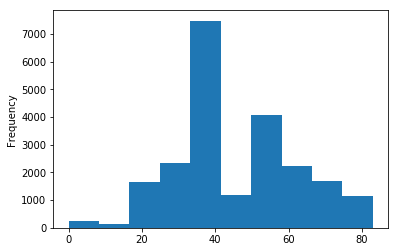

In [11]:
#item['item_category_id'].plot.hist()

In [16]:
item.tail(100)

,item_name,item_id,item_category_id
22070,ЭТИМ УТРОМ В НЬЮ-ЙОРКЕ,22070,40
22071,ЭТОТ НЕЛОВКИЙ МОМЕНТ,22071,40
22072,ЭФФЕКТ КОЛИБРИ,22072,40
22073,ЭФФЕКТ КОЛИБРИ (BD),22073,37
22074,ЭФФЕКТ КОЛИБРИ (регион),22074,40
22075,ЭФФЕКТИВНОЕ ПОХУДАНИЕ:Фитнес-йога. Начальный у...,22075,40
22076,"Эадор. Владыки миров [PC, Jewel, русская версия]",22076,30
22077,Эадор. Сотворение,22077,30
22078,"Эадор: Владыки миров [PC, Цифровая версия]",22078,31
22079,"Эврика [PC, Jewel]",22079,30


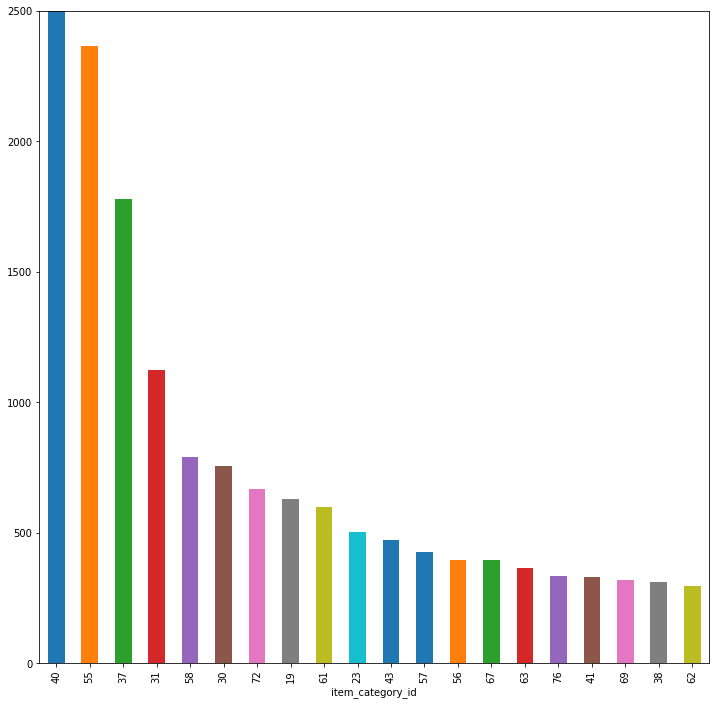

In [54]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_ylim(top=2500)
item.groupby(['item_category_id'])['item_id'].count().sort_values(ascending=False).head(20).plot.bar()
#ax.set_xticklabels(labels=item['item_id'], rotation=90)
#ax.legend()

In [64]:
#item.groupby(['item_category_id'])['item_id'].count().sort_values(ascending=False).head(10)
train.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [69]:
train['date_block_num'].describe()

count    2.935849e+06
mean     1.456991e+01
std      9.422988e+00
min      0.000000e+00
25%      7.000000e+00
50%      1.400000e+01
75%      2.300000e+01
max      3.300000e+01
Name: date_block_num, dtype: float64

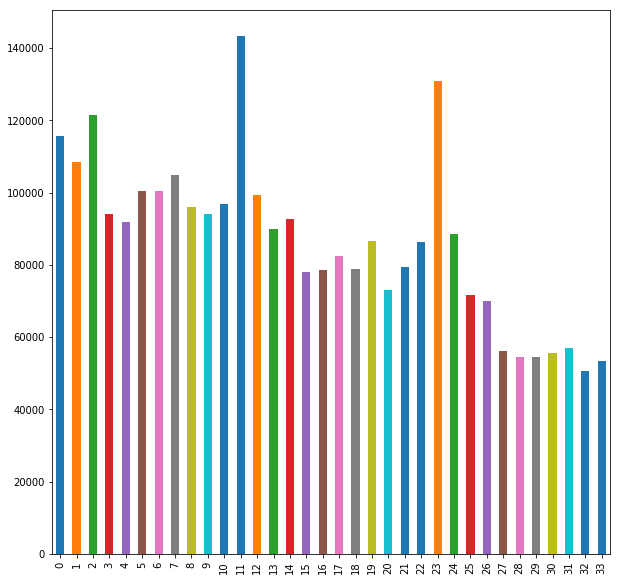

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
train['date_block_num'].value_counts().sort_index().plot.bar()

In [103]:
print(train.groupby(['date_block_num'])[['shop_id','item_id']].nunique())
train[train['date_block_num'] == 0]['shop_id'].value_counts()

                shop_id  item_id
date_block_num                  
0                    45     8115
1                    46     8168
2                    46     8302
3                    46     8145
4                    45     8339
5                    46     8478
6                    46     8405
7                    45     8031
8                    45     7876
9                    46     8039
10                   45     8089
11                   46     8474
12                   46     7551
13                   46     7134
14                   48     7142
15                   49     6774
16                   49     6685
17                   49     6681
18                   50     6611
19                   51     6363
20                   50     6071
21                   52     6334
22                   50     6322
23                   50     6605
24                   50     6139
25                   47     6053
26                   46     6082
27                   47     5476
28        

31    8439
54    7526
25    6971
28    5720
0     4793
27    4696
42    3474
6     3254
46    3008
50    3006
56    2980
30    2761
16    2756
19    2729
1     2694
18    2531
29    2524
15    2410
51    2401
7     2278
37    2241
26    2144
35    1979
47    1925
4     1894
53    1888
59    1847
41    1839
23    1807
52    1650
24    1643
14    1625
22    1606
44    1575
38    1569
43    1560
45    1478
21    1403
8     1389
32    1185
13    1078
2     1071
10     875
3      749
12     719
Name: shop_id, dtype: int64

In [127]:
for key, item in traingroup:
    print(traingroup.get_group(key), "\n\n")
    #print(key,"_",item['shop_id'])

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0       02.01.2013               0       59    22154      999.00           1.0
1       03.01.2013               0       25     2552      899.00           1.0
2       05.01.2013               0       25     2552      899.00          -1.0
3       06.01.2013               0       25     2554     1709.05           1.0
4       15.01.2013               0       25     2555     1099.00           1.0
5       10.01.2013               0       25     2564      349.00           1.0
6       02.01.2013               0       25     2565      549.00           1.0
7       04.01.2013               0       25     2572      239.00           1.0
8       11.01.2013               0       25     2572      299.00           1.0
9       03.01.2013               0       25     2573      299.00           3.0
10      03.01.2013               0       25     2574      399.00           2.0
11      05.01.2013               0       25     2574

               date  date_block_num  shop_id  item_id  item_price  \
2553730  18.04.2015              27       27    12020      399.00   
2553731  16.04.2015              27       29     2734      699.00   
2553732  25.04.2015              27       29     2470      299.00   
2553733  08.04.2015              27       29     2698     3199.00   
2553734  04.04.2015              27       29     2698     3199.00   
2553735  19.04.2015              27       29     2696     1199.00   
2553736  14.04.2015              27       29     2445      599.00   
2553737  12.04.2015              27       29     2416      699.00   
2553738  07.04.2015              27       29     2210      499.00   
2553739  02.04.2015              27       29     2104      449.00   
2553740  24.04.2015              27       29     2271     1999.00   
2553741  18.04.2015              27       29     2271     1999.00   
2553742  24.04.2015              27       29     2267     1999.00   
2553743  25.04.2015              2

In [128]:
# shop_id per date_block_num
fig = plt.figure(figsize=(20,10))
fig1 = [plt.bar(train['date_block_num'].sort_index(), )]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [133]:
test.tail(30)

,ID,shop_id,item_id
214170,214170,45,14543
214171,214171,45,19253
214172,214172,45,17957
214173,214173,45,12470
214174,214174,45,7543
214175,214175,45,6661
214176,214176,45,11137
214177,214177,45,11489
214178,214178,45,9782
214179,214179,45,2972
